**Case Study Data Mining: Aplikasi model Klasifikasi**

Anggota Kelompok 1

* Tsabita Asir Saladin (210670786)
* Annisa Fitria Anwar Damanik (2106639900)
* Audrey Clarissa (2106724864)
* Rifqi hafizuddin (2106638204)
* Andri Naufal Al'afif (2106725085)

Domain Knowledge & Data Understanding:
- Data dibawah ini adalah data Hoax dari https://www.mafindo.or.id/ yang didapatkan secara legal dengan meminta izin kepada pimpinan perusahaan Mafindo.
- Label "0" menyatakan bukan Hoax dan "1" menyatakan post Hoax.

Tugas Anda:
- Lakukan PreProcessing pada variabel "teks" di data.
- Lalukan EDA pada data Hoax tersebut.
- Buat Model klasifikasi Hoax terbaik dengan parameter optimal (dan cross validated)
- Buatlah sebuah laporan Analisa Data tersebut (di Jupyter Notebook) seolah-olah anda adalah seorang Data Scientist Kominfo dan ditugaskan oleh menteri-nya untuk menjelaskan tentang data Hoax yang ada.
- Jangan lupa jika anda akan melakukan attach gambar (misal screenshot dari Voyant Tools) maka jangan load local file, tapi upload terlebih dahulu ke GitHub (kalian sendiri) lalu load di Jupyter Notebook.
- Cara load image dengan markdown saat gambar ada di GitHub: https://stackoverflow.com/a/63270255/2844866
- Ingat jangan load local image(s) karena dosen tidak akan bisa membukanya.
- Teknik preprocessing, slicing data, variabel selection & engineering, pemilihan visualisasi, interpretasi, Performa model klasifikasi, dan penyajian report adalah hal-hal yang akan dinilai dari kasus ini.
- Code harus bisa di "Run-All" di Google Colab, "Error Free", dan TIDAK PERLU REQUEST ACCESS (bisa dibuka oleh umum/public).
- link colab: https://colab.research.google.com/drive/1nh-B3vKCj36urAvZqlbJGxDiiwjZnJ6-?usp=sharing

#1. Preprocessing

In [ ]:
# Loading Data
import warnings; warnings.simplefilter('ignore')
import pandas as pd

fData = 'data/Data-Hoax-Mafindo.csv'
try:
    data = pd.read_csv(fData)
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/Data-Hoax-Mafindo.csv
    data = pd.read_csv(fData)

data.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                4701 non-null   int64 
 1   label             4701 non-null   int64 
 2   tanggal           4701 non-null   object
 3   judul             4701 non-null   object
 4   narasi            4701 non-null   object
 5   nama file gambar  4701 non-null   object
dtypes: int64(2), object(4)
memory usage: 220.5+ KB


In [ ]:
data['label'].value_counts()

1    3850
0     851
Name: label, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

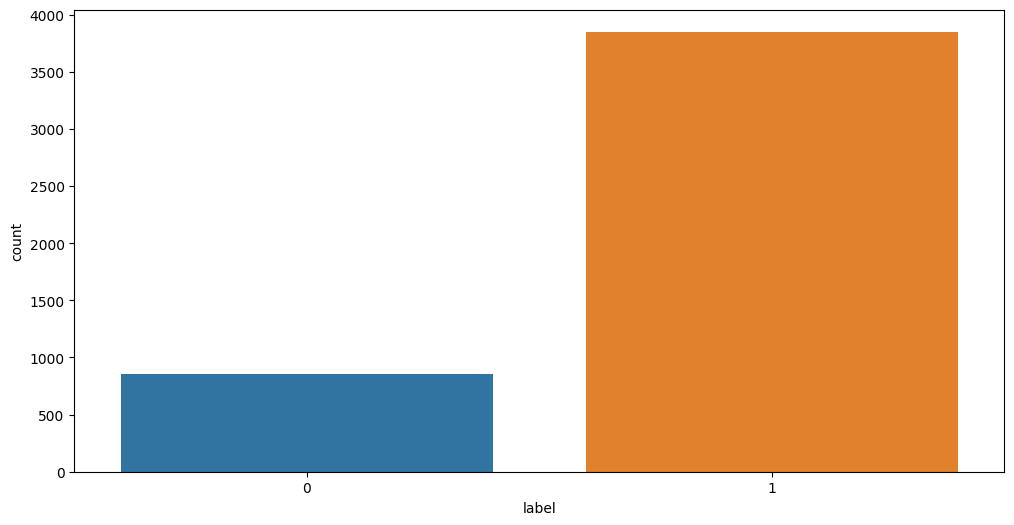

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'label', data = data)

In [ ]:
data

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg
...,...,...,...,...,...,...
4696,988471,0,27-Jun-18,Banser-PDIP Berdamai,Ratusan massa dari Barisan Serba Guna (Banser)...,988471.png
4697,991611,1,23-Jul-20,ERDOGAN TAK MAU DUDUK DI KURSI TAMU YANG LEBIH...,ERDOGAN DATANG KE VATIKAN MENJUMPAI BABA (POP)...,991611.png
4698,992733,1,1-Apr-20,"Imigran China Sengaja Membawa Virus, Tujuannya...",IMIGRAN CN SENGAJA MEMBAWA VIRUS DAN MEREKA TE...,992733.jpg
4699,995077,1,5-Mar-19,BUKTI KECURANGAN JOKOWI BAGI SEMBAKO,Beredar dimana mana jadi VIRAL video ini\nApa ...,995077.png


In [ ]:
data.isna().sum()

ID                  0
label               0
tanggal             0
judul               0
narasi              0
nama file gambar    0
dtype: int64

In [ ]:
!pip install Sastrawi

In [ ]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

##Tokenisasi

In [ ]:
import string
import re #untuk regular expression
import nltk
nltk.download('punkt')
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#remove unnneccesary characters
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

# remove semua karakter terkait html: unescape html eg. &nbsp; &amp; | link/url | tag html
import html
def remove_html(text):
    text = html.unescape(text)
    tag_pattern = re.compile(r'<.*?>')
    text = tag_pattern.sub(r'',text)
    regex_str = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
    url_pattern = re.compile(regex_str)
    text = url_pattern.sub(r'', text)
    return text

 #Remove punctuations, links, mentions and \r\n new line characters
def remove_all_entities(text):
    text = text.lower()
    text = re.sub(r'(\w)(\1{2,})', r"\1", text) # will replace repeated char
    text = text.replace('\\r', ' ').replace('\\n', ' ') #remove \n and \r
    text = re.sub(r"\S*@\S*\s?", " ", text) #remove email
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r' ', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    text = text.translate(text.maketrans(string.punctuation, ' '*len(string.punctuation)))
    text = ' '.join(word for word in text.split() if not word.isnumeric()) #remove word only number
    text = re.sub(r'\b\w\b', "", text) #remove one letter only
    text = re.sub("(username|user|url|rt)\s|\s(user|url|rt)","",text)
    text = ' '.join(word for word in text.split() if len(word) < 21) # remove words longer than 21 characters
    text = ' '.join(word for word in text.split() if len(word) > 1) # remove words contain single letter only
    return text

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

#remove punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans("","",string.punctuation))

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

# cleaning non alpha-numeric
def remove_non_alphanumeric(text):
    return re.sub(r'[^\w]'," ",text)

# NLTK word rokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [ ]:
data['judul']=data['judul'].str.lower()
data['narasi']=data['narasi'].str.lower()

In [ ]:
data['tokenized_judul'] = data['judul'].apply(remove_tweet_special)
data['tokenized_judul'] = data['judul'].apply(remove_html)
data['tokenized_judul'] = data['judul'].apply(remove_all_entities)
data['tokenized_judul'] = data['judul'].apply(remove_number)
data['tokenized_judul'] = data['judul'].apply(remove_punctuation)
data['tokenized_judul'] = data['judul'].apply(remove_whitespace_LT)
data['tokenized_judul'] = data['judul'].apply(remove_whitespace_multiple)
data['tokenized_judul'] = data['judul'].apply(remove_singl_char)
data['tokenized_judul'] = data['judul'].apply(remove_non_alphanumeric)
data['tokenized_judul'] = data['judul'].apply(word_tokenize_wrapper)

In [ ]:
data['tokenized_narasi'] = data['narasi'].apply(remove_tweet_special)
data['tokenized_narasi'] = data['narasi'].apply(remove_html)
data['tokenized_narasi'] = data['narasi'].apply(remove_all_entities)
data['tokenized_narasi'] = data['narasi'].apply(remove_number)
data['tokenized_narasi'] = data['narasi'].apply(remove_punctuation)
data['tokenized_narasi'] = data['narasi'].apply(remove_whitespace_LT)
data['tokenized_narasi'] = data['narasi'].apply(remove_whitespace_multiple)
data['tokenized_narasi'] = data['narasi'].apply(remove_singl_char)
data['tokenized_narasi'] = data['narasi'].apply(remove_non_alphanumeric)
data['tokenized_narasi'] = data['narasi'].apply(word_tokenize_wrapper)

In [ ]:
data

,ID,label,tanggal,judul,narasi,nama file gambar,tokenized_judul,tokenized_narasi
0,71,1,17-Aug-20,pemakaian masker menyebabkan penyakit legionna...,a caller to a radio talk show recently shared ...,71.jpg,"[pemakaian, masker, menyebabkan, penyakit, leg...","[a, caller, to, a, radio, talk, show, recently..."
1,461,1,17-Jul-20,instruksi gubernur jateng tentang penilangan ...,yth.seluruh anggota grup sesuai instruksi gube...,461.png,"[instruksi, gubernur, jateng, tentang, penilan...","[yth.seluruh, anggota, grup, sesuai, instruksi..."
2,495,1,13-Jul-20,foto jim rohn: jokowi adalah presiden terbaik ...,jokowi adalah presiden terbaik dlm sejarah ban...,495.png,"[foto, jim, rohn, :, jokowi, adalah, presiden,...","[jokowi, adalah, presiden, terbaik, dlm, sejar..."
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan pak jokowi b...","maaf mas2 dan mbak2, ini bukan politik, tapi k...",550.png,"[ini, bukan, politik, ,, tapi, kenyataan, pak,...","[maaf, mas2, dan, mbak2, ,, ini, bukan, politi..."
4,681,1,24-Jun-20,foto kadrun kalo lihat foto ini panas dingin,kadrun kalo lihat foto ini panas dingin . .,681.jpg,"[foto, kadrun, kalo, lihat, foto, ini, panas, ...","[kadrun, kalo, lihat, foto, ini, panas, dingin..."
...,...,...,...,...,...,...,...,...
4696,988471,0,27-Jun-18,banser-pdip berdamai,ratusan massa dari barisan serba guna (banser)...,988471.png,"[banser-pdip, berdamai]","[ratusan, massa, dari, barisan, serba, guna, (..."
4697,991611,1,23-Jul-20,erdogan tak mau duduk di kursi tamu yang lebih...,erdogan datang ke vatikan menjumpai baba (pop)...,991611.png,"[erdogan, tak, mau, duduk, di, kursi, tamu, ya...","[erdogan, datang, ke, vatikan, menjumpai, baba..."
4698,992733,1,1-Apr-20,"imigran china sengaja membawa virus, tujuannya...",imigran cn sengaja membawa virus dan mereka te...,992733.jpg,"[imigran, china, sengaja, membawa, virus, ,, t...","[imigran, cn, sengaja, membawa, virus, dan, me..."
4699,995077,1,5-Mar-19,bukti kecurangan jokowi bagi sembako,beredar dimana mana jadi viral video ini\napa ...,995077.png,"[bukti, kecurangan, jokowi, bagi, sembako]","[beredar, dimana, mana, jadi, viral, video, in..."


In [ ]:
def freqDist_wrapper(text):
    return FreqDist(text)

data['tokenized_judul_freq'] = data['tokenized_judul'].apply(freqDist_wrapper)
data['tokenized_narasi_freq'] = data['tokenized_narasi'].apply(freqDist_wrapper)

##Stop Word

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# stopword indonesia from NTLK library
list_stopwords_indo = stopwords.words('indonesian')
list_stopwords_eng = stopwords.words("english")

# append additional stopword
list_stopwords_indo.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen'])

list_stopwords_eng.extend(['u', 'nan', 'loh', 'rt',
                       '&amp', 'yah',"i", "me", "my", "myself", "we",
                       "our", "ours", "ourselves", "you", "your", "yours",
                       "yourself", "yourselves", "he", "him", "his", "himself",
                       "she", "her", "hers", "herself", "it", "its", "itself",
                       "they", "them", "their", "theirs", "themselves", "what",
                       "which", "who", "whom", "this", "that", "these", "those",
                       "am", "is", "are", "was", "were", "be", "been", "being",
                       "have", "has", "had", "having", "do", "does", "did",
                       "doing", "a", "an", "the", "and", "but", "if", "or",
                       "because", "as", "until", "while", "of", "at", "by",
                       "for", "with", "about", "against", "between", "into",
                       "through", "during", "before", "after", "above", "below",
                       "to", "from", "up", "down", "in", "out", "on", "off",
                       "over", "under", "again", "further", "then", "once",
                       "here", "there", "when", "where", "why", "how", "all",
                       "any", "both", "each", "few", "more", "most", "other",
                       "some", "such", "no", "nor", "not", "only", "own",
                       "same", "so", "than", "too", "very", "s", "t", "can",
                       "will", "just", "don", "should", "now"])

# convert list to dictionary
list_stopwords_indo = set(list_stopwords_indo)
list_stopwords_eng = set(list_stopwords_eng)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#remove stopword pada list token
def stopwords_removal_indo(words):
    return [word for word in words if word not in list_stopwords_indo]
def stopwords_removal_eng(words):
    return [word for word in words if word not in list_stopwords_eng]

In [ ]:
data['judul_stopword_applied'] = data['tokenized_judul'].apply(stopwords_removal_indo)
data['narasi_stopword_applied'] = data['tokenized_narasi'].apply(stopwords_removal_indo)
data['judul_stopword_applied'] = data['judul_stopword_applied'].apply(stopwords_removal_eng)
data['narasi_stopword_applied'] = data['narasi_stopword_applied'].apply(stopwords_removal_eng)

##normalisasi

In [ ]:
# mengganti kata alay ke kata standar baku
# list slang dapat dari : https://medium.com/@arie.pratama.s/bahasa-indonesia-open-sourced-nlp-resources-8cb394193238

kamusalay = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')

In [ ]:
kamusalay[['slang', 'formal']]

,slang,formal
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa
...,...,...
15001,gataunya,enggak taunya
15002,gtau,enggak tau
15003,gatau,enggak tau
15004,fans2,fan-fan


In [ ]:
katabaku_dict = {}

for index, row in kamusalay.iterrows():
    if row[0] not in katabaku_dict:
        katabaku_dict[row[0]] = row[1]

def normalized_term(document):
    return [katabaku_dict[term] if term in katabaku_dict else term for term in document]

In [ ]:
data['judul_baku'] = data['judul_stopword_applied'].apply(normalized_term)
data['narasi_baku'] = data['narasi_stopword_applied'].apply(normalized_term)

In [ ]:
data.head()

,ID,label,tanggal,judul,narasi,nama file gambar,tokenized_judul,tokenized_narasi,tokenized_judul_freq,tokenized_narasi_freq,judul_stopword_applied,narasi_stopword_applied,judul_baku,narasi_baku
0,71,1,17-Aug-20,pemakaian masker menyebabkan penyakit legionna...,a caller to a radio talk show recently shared ...,71.jpg,"[pemakaian, masker, menyebabkan, penyakit, leg...","[a, caller, to, a, radio, talk, show, recently...","{'pemakaian': 1, 'masker': 1, 'menyebabkan': 1...","{'a': 4, 'caller': 1, 'to': 3, 'radio': 1, 'ta...","[pemakaian, masker, menyebabkan, penyakit, leg...","[caller, radio, talk, show, recently, shared, ...","[pemakaian, masker, menyebabkan, penyakit, leg...","[caller, radio, talk, show, recently, shared, ..."
1,461,1,17-Jul-20,instruksi gubernur jateng tentang penilangan ...,yth.seluruh anggota grup sesuai instruksi gube...,461.png,"[instruksi, gubernur, jateng, tentang, penilan...","[yth.seluruh, anggota, grup, sesuai, instruksi...","{'instruksi': 1, 'gubernur': 1, 'jateng': 1, '...","{'yth.seluruh': 1, 'anggota': 1, 'grup': 1, 's...","[instruksi, gubernur, jateng, penilangan, berm...","[yth.seluruh, anggota, grup, sesuai, instruksi...","[instruksi, gubernur, jateng, penilangan, berm...","[yth.seluruh, anggota, grup, sesuai, instruksi..."
2,495,1,13-Jul-20,foto jim rohn: jokowi adalah presiden terbaik ...,jokowi adalah presiden terbaik dlm sejarah ban...,495.png,"[foto, jim, rohn, :, jokowi, adalah, presiden,...","[jokowi, adalah, presiden, terbaik, dlm, sejar...","{'foto': 1, 'jim': 1, 'rohn': 1, ':': 1, 'joko...","{'jokowi': 1, 'adalah': 1, 'presiden': 1, 'ter...","[foto, jim, rohn, :, jokowi, presiden, terbaik...","[jokowi, presiden, terbaik, dlm, sejarah, bang...","[foto, jim, rohn, :, jokowi, presiden, terbaik...","[jokowi, presiden, terbaik, dalam, sejarah, ba..."
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan pak jokowi b...","maaf mas2 dan mbak2, ini bukan politik, tapi k...",550.png,"[ini, bukan, politik, ,, tapi, kenyataan, pak,...","[maaf, mas2, dan, mbak2, ,, ini, bukan, politi...","{'ini': 1, 'bukan': 1, 'politik': 1, ',': 1, '...","{'maaf': 1, 'mas2': 1, 'dan': 1, 'mbak2': 1, '...","[politik, ,, kenyataan, jokowi, berhasil, memu...","[maaf, mas2, mbak2, ,, politik, ,, kenyataan, ...","[politik, ,, kenyataan, jokowi, berhasil, memu...","[maaf, mas2, mbak-mbak, ,, politik, ,, kenyata..."
4,681,1,24-Jun-20,foto kadrun kalo lihat foto ini panas dingin,kadrun kalo lihat foto ini panas dingin . .,681.jpg,"[foto, kadrun, kalo, lihat, foto, ini, panas, ...","[kadrun, kalo, lihat, foto, ini, panas, dingin...","{'foto': 2, 'kadrun': 1, 'kalo': 1, 'lihat': 1...","{'kadrun': 1, 'kalo': 1, 'lihat': 1, 'foto': 1...","[foto, kadrun, lihat, foto, panas, dingin]","[kadrun, lihat, foto, panas, dingin, ., .]","[foto, kadrun, lihat, foto, panas, dingin]","[kadrun, lihat, foto, panas, dingin, ., .]"


##stemming

In [ ]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=492be833c61a312ad3f3c4d19a11da595d0e191f8494aad057346721de2e2a59
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
# import Sastrawi package
# pake swifter biar eksekusinya cepat

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

judul_term_dict = {}

for document in data['judul_baku']:
    for term in document:
        if term not in judul_term_dict:
            judul_term_dict[term] = ' '

for term in judul_term_dict:
    judul_term_dict[term] = stemmed_wrapper(term)

# apply stemmed term to dataframe

def get_judul_stemmed_term(document):
    return [judul_term_dict[term] for term in document]

data['judul_stemmed'] = data['judul_baku'].swifter.apply(get_judul_stemmed_term)

Pandas Apply:   0%|          | 0/4701 [00:00<?, ?it/s]

In [ ]:
# import Sastrawi package
# pake swifter biar eksekusinya cepat

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

narasi_term_dict = {}

for document in data['narasi_baku']:
    for term in document:
        if term not in narasi_term_dict:
            narasi_term_dict[term] = ' '

for term in narasi_term_dict:
    narasi_term_dict[term] = stemmed_wrapper(term)

# apply stemmed term to dataframe

def get_narasi_stemmed_term(document):
    return [narasi_term_dict[term] for term in document]

data['narasi_stemmed'] = data['narasi_baku'].swifter.apply(get_narasi_stemmed_term)

Pandas Apply:   0%|          | 0/4701 [00:00<?, ?it/s]

In [ ]:
data['judul_clean_string'] = data['judul_stemmed'].apply(lambda x : " ".join(x))
data['narasi_clean_string'] = data['narasi_stemmed'].apply(lambda x : " ".join(x))

In [ ]:
data.to_csv("Text_Preprocessing_notinclude_tfidf.csv")

##TF IDF

In [ ]:
data = pd.read_csv("/content/Text_Preprocessing_notinclude_tfidf.csv")

In [ ]:
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

data['judul_list'] = data['judul_stemmed'].apply(convert_text_list)
data['narasi_list'] = data['narasi_stemmed'].apply(convert_text_list)

In [ ]:
def calc_TF_judul(document):
    # Counts the number of times the word appears in review
    TF_dict_judul = {}
    for term in document:
        if term in TF_dict_judul:
            TF_dict_judul[term] += 1
        else:
            TF_dict_judul[term] = 1
    # Computes tf for each word
    for term in TF_dict_judul:
        TF_dict_judul[term] = TF_dict_judul[term] / len(document)
    return TF_dict_judul

def calc_TF_narasi(document):
    # Counts the number of times the word appears in review
    TF_dict_narasi = {}
    for term in document:
        if term in TF_dict_narasi:
            TF_dict_narasi[term] += 1
        else:
            TF_dict_narasi[term] = 1
    # Computes tf for each word
    for term in TF_dict_narasi:
        TF_dict_narasi[term] = TF_dict_narasi[term] / len(document)
    return TF_dict_narasi

In [ ]:
data["TF_dict_judul"] = data['judul_list'].apply(calc_TF_judul)
data["TF_dict_narasi"] = data['narasi_list'].apply(calc_TF_narasi)

In [ ]:
def calc_DF_judul(tfDict):
    count_DF_judul = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF_judul:
                count_DF_judul[term] += 1
            else:
                count_DF_judul[term] = 1
    return count_DF_judul

def calc_DF_narasi(tfDict):
    count_DF_narasi = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF_narasi:
                count_DF_narasi[term] += 1
            else:
                count_DF_narasi[term] = 1
    return count_DF_narasi

In [ ]:
DFresult_judul = calc_DF_judul(data["TF_dict_judul"])
DFresult_narasi = calc_DF_narasi(data["TF_dict_narasi"])

In [ ]:
# cacl idf
n_document = len(data)

def calc_IDF_judul(__n_document, __DF):
    IDF_Dict_judul = {}
    for term in __DF:
        IDF_Dict_judul[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict_judul

def calc_IDF_narasi(__n_document, __DF):
    IDF_Dict_narasi = {}
    for term in __DF:
        IDF_Dict_narasi[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict_narasi

In [ ]:
#Stores the idf dictionary
IDFresult_judul = calc_IDF_judul(n_document, DFresult_judul)
IDFresult_narasi = calc_IDF_narasi(n_document, DFresult_narasi)

In [ ]:
#calc TF-IDF
def calc_TF_IDF_judul(TF):
    TF_IDF_Dict_judul = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict_judul[key] = TF[key] * IDFresult_judul[key]
    return TF_IDF_Dict_judul

def calc_TF_IDF_narasi(TF):
    TF_IDF_Dict_narasi = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict_narasi[key] = TF[key] * IDFresult_narasi[key]
    return TF_IDF_Dict_narasi

In [ ]:
data["TF-IDF_dict_judul"] = data["TF_dict_judul"].apply(calc_TF_IDF_judul)
data["TF-IDF_dict_narasi"] = data["TF_dict_narasi"].apply(calc_TF_IDF_narasi)

In [ ]:
positive_word = pd.read_csv('https://github.com/andrinau/postif-negativ-txt/raw/main/positive.txt')
negative_word = pd.read_csv('https://github.com/andrinau/postif-negativ-txt/raw/main/negative.txt')
kata_positive = positive_word['a+'].tolist()
kata_negative = negative_word['abnormal'].tolist()

In [ ]:
# cacl tf-idf total for positive word
def calc_positive_judul(TF_IDF_Dict_judul):
  total_judul = 0
  for key in TF_IDF_Dict_judul:
    if key in kata_positive:
      total_judul = total_judul + TF_IDF_Dict_judul[key]

  return total_judul

def calc_positive_narasi(TF_IDF_Dict_narasi):
  total_narasi = 0
  for key in TF_IDF_Dict_narasi:
    if key in kata_positive:
      total_narasi = total_narasi + TF_IDF_Dict_narasi[key]

  return total_narasi

In [ ]:
# cacl tf-idf total for negative word
def calc_negative_judul(TF_IDF_Dict_judul):
  total_judul = 0
  for key in TF_IDF_Dict_judul:
    if key in kata_negative:
      total_judul = total_judul + TF_IDF_Dict_judul[key]

  return total_judul

def calc_negative_narasi(TF_IDF_Dict_narasi):
  total_narasi = 0
  for key in TF_IDF_Dict_narasi:
    if key in kata_negative:
      total_narasi = total_narasi + TF_IDF_Dict_narasi[key]

  return total_narasi

In [ ]:
data["TF-IDF_positive_judul"] = data["TF-IDF_dict_judul"].apply(calc_positive_judul)
data["TF-IDF_negative_judul"] = data["TF-IDF_dict_judul"].apply(calc_negative_judul)
data["TF-IDF_positive_narasi"] = data["TF-IDF_dict_narasi"].apply(calc_positive_narasi)
data["TF-IDF_negative_narasi"] = data["TF-IDF_dict_narasi"].apply(calc_negative_narasi)

In [ ]:
conditions = [
    (data['TF-IDF_positive_judul'] < data['TF-IDF_negative_judul']),
    (data['TF-IDF_positive_judul'] > data['TF-IDF_negative_judul']),
    (data['TF-IDF_positive_judul'] == data['TF-IDF_negative_judul'])]
choices = ['negative','positive','neutral']

data['status_judul'] = np.select(conditions, choices)

conditions = [
    (data['TF-IDF_positive_narasi'] < data['TF-IDF_negative_narasi']),
    (data['TF-IDF_positive_narasi'] > data['TF-IDF_negative_narasi']),
    (data['TF-IDF_positive_narasi'] == data['TF-IDF_negative_narasi'])]
choices = ['negative','positive','neutral']

data['status_narasi'] = np.select(conditions, choices)

In [ ]:
# Check TF-IDF result
index = 90

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in data["TF-IDF_dict_judul"][index]:
    print('%20s' % key, "\t", data["TF_dict_judul"][index][key] ,"\t" , data["TF-IDF_dict_judul"][index][key])


print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in data["TF-IDF_dict_narasi"][index]:
    print('%20s' % key, "\t", data["TF_dict_narasi"][index][key] ,"\t" , data["TF-IDF_dict_narasi"][index][key])

                term 	         TF 	              TF-IDF

         universitas 	 0.125 	 0.6888864439822112
        muhammadiyah 	 0.125 	 0.7970111236680368
              kupang 	 0.125 	 0.88365452123803
              bantah 	 0.125 	 0.4903663797338593
         menginisasi 	 0.125 	 0.9702979188080232
                gera 	 0.125 	 0.727059150176109
                     	 0.125 	 0.14789151730676053
   gantipresiden2019 	 0.125 	 0.9702979188080232
                term 	         TF 	              TF-IDF

                kait 	 0.034482758620689655 	 0.14089940270886583
               salah 	 0.034482758620689655 	 0.11721671467847664
               dosen 	 0.034482758620689655 	 0.20888397442157794
            insiator 	 0.034482758620689655 	 0.26766839139531673
                gera 	 0.06896551724137931 	 0.3611486004245469
                     	 0.27586206896551724 	 0.047179670004312925
   gantipresiden2019 	 0.034482758620689655 	 0.26766839139531673
           kabupaten 	 0.034

<Axes: xlabel='status_judul', ylabel='count'>

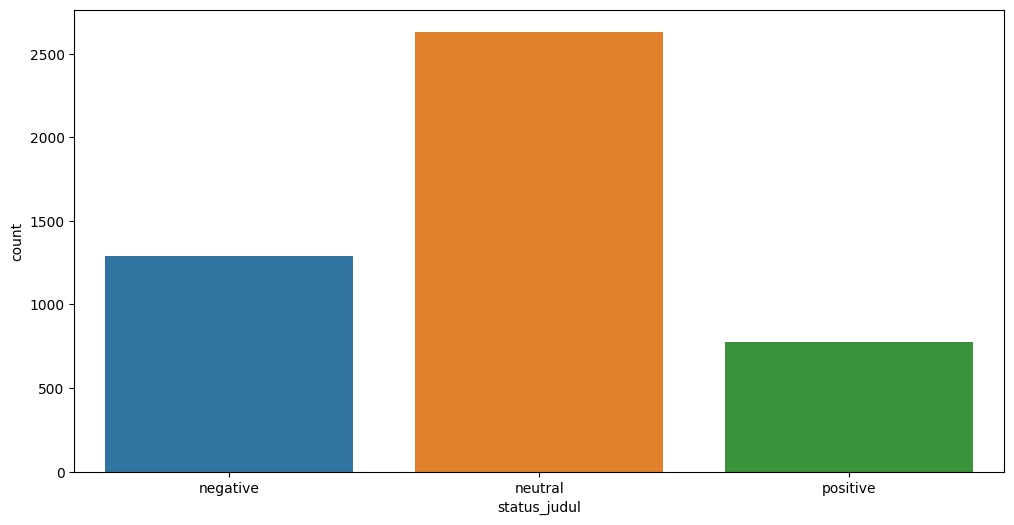

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'status_judul', data = data)

Dapat disimpulkan bahwa terdapat prevalensi yang lebih tinggi pada kategori judul dengan orientasi netral dibandingkan dengan judul-judul yang memiliki orientasi negatif maupun positif.

<Axes: xlabel='status_narasi', ylabel='count'>

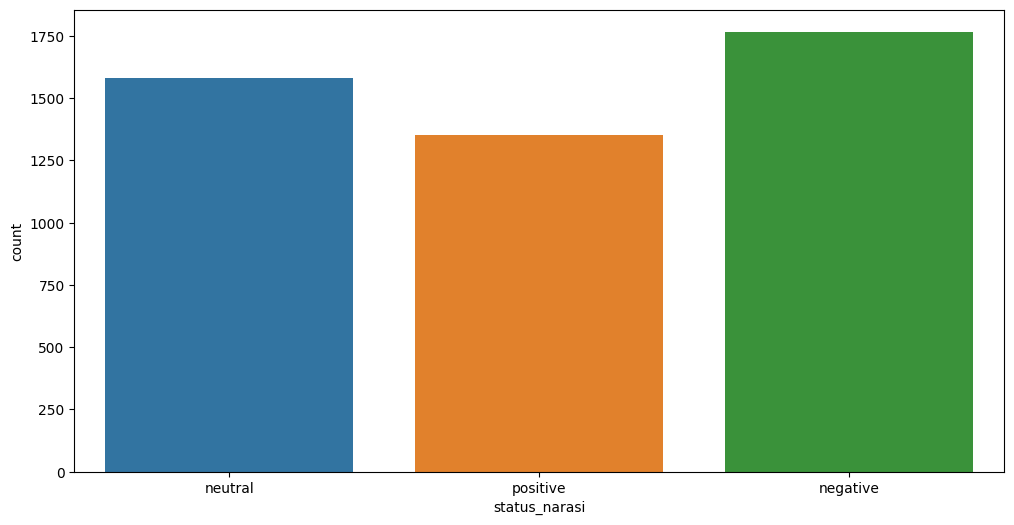

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'status_narasi', data = data)

Terlihat bahwa terdapat kecenderungan lebih banyak narasi yang cenderung negatif dibandingkan dengan narasi yang memiliki orientasi netral dan positif. Meskipun demikian, perlu dicatat bahwa perbedaan antara jumlah narasi dalam ketiga kategori tersebut tidak terlalu signifikan perbedaannya. Dengan demikian, hasil ini menunjukkan bahwa meskipun ada perbedaan dalam distribusi narasi positif, netral, dan negatif, perbedaan tersebut tidak dianggap signifikan.

In [ ]:
data.to_csv("Text_Preprocessing_complete.csv")

#Pembagian Dataset dan Penanganan Imbalance Dataset

In [ ]:
import pandas as pd
data = pd.read_csv("/content/Text_Preprocessing_complete.csv")

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,ID,label,tanggal,judul,narasi,nama file gambar,tokenized_judul,tokenized_narasi,...,TF_dict_judul,TF_dict_narasi,TF-IDF_dict_judul,TF-IDF_dict_narasi,TF-IDF_positive_judul,TF-IDF_negative_judul,TF-IDF_positive_narasi,TF-IDF_negative_narasi,status_judul,status_narasi
0,0,0,71,1,17-Aug-20,pemakaian masker menyebabkan penyakit legionna...,a caller to a radio talk show recently shared ...,71.jpg,"['pemakaian', 'masker', 'menyebabkan', 'penyak...","['a', 'caller', 'to', 'a', 'radio', 'talk', 's...",...,"{'pakai': 0.2, 'masker': 0.2, 'sebab': 0.2, 's...","{'caller': 0.01694915254237288, 'radio': 0.016...","{'pakai': 0.8656792291958079, 'masker': 1.0640...","{'caller': 0.13156581949939297, 'radio': 0.124...",0.000000,0.900857,0.000000,0.000000,negative,neutral
1,1,1,461,1,17-Jul-20,instruksi gubernur jateng tentang penilangan ...,yth.seluruh anggota grup sesuai instruksi gube...,461.png,"['instruksi', 'gubernur', 'jateng', 'tentang',...","['yth.seluruh', 'anggota', 'grup', 'sesuai', '...",...,"{'instruksi': 0.09090909090909091, 'gubernur':...","{'yth seluruh': 0.058823529411764705, 'anggota...","{'instruksi': 0.6223720562354573, 'gubernur': ...","{'yth seluruh': 0.4327598966091777, 'anggota':...",0.000000,0.000000,0.527738,0.000000,neutral,positive
2,2,2,495,1,13-Jul-20,foto jim rohn: jokowi adalah presiden terbaik ...,jokowi adalah presiden terbaik dlm sejarah ban...,495.png,"['foto', 'jim', 'rohn', ':', 'jokowi', 'adalah...","['jokowi', 'adalah', 'presiden', 'terbaik', 'd...",...,"{'foto': 0.09090909090909091, 'jim': 0.0909090...","{'jokowi': 0.07142857142857142, 'presiden': 0....","{'foto': 0.2318335166335964, 'jim': 0.66881074...","{'jokowi': 0.19823985157193308, 'presiden': 0....",0.550694,0.000000,0.667334,0.000000,positive,positive
3,3,3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan pak jokowi b...","maaf mas2 dan mbak2, ini bukan politik, tapi k...",550.png,"['ini', 'bukan', 'politik', ',', 'tapi', 'keny...","['maaf', 'mas2', 'dan', 'mbak2', ',', 'ini', '...",...,"{'politik': 0.08333333333333333, '': 0.1666666...","{'maaf': 0.011904761904761904, 'mas2': 0.01190...","{'politik': 0.47895669416016, '': 0.1971886897...","{'maaf': 0.05317317243404591, 'mas2': 0.092409...",0.000000,0.000000,0.250094,0.236157,neutral,positive
4,4,4,681,1,24-Jun-20,foto kadrun kalo lihat foto ini panas dingin,kadrun kalo lihat foto ini panas dingin . .,681.jpg,"['foto', 'kadrun', 'kalo', 'lihat', 'foto', 'i...","['kadrun', 'kalo', 'lihat', 'foto', 'ini', 'pa...",...,"{'foto': 0.3333333333333333, 'kadrun': 0.16666...","{'kadrun': 0.14285714285714285, 'lihat': 0.142...","{'foto': 0.85005622765652, 'kadrun': 1.0430509...","{'kadrun': 0.8309247430584102, 'lihat': 0.5683...",0.909966,2.050982,0.700026,1.541538,negative,negative


In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [ ]:
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

data['judul_list'] = data['judul_stemmed'].apply(convert_text_list)
data['narasi_list'] = data['narasi_stemmed'].apply(convert_text_list)

In [ ]:
data['judul_cleaned']=[[' '.join(i)] for i in data['judul_list']]
data['narasi_cleaned']=[[' '.join(i)] for i in data['narasi_list']]

In [ ]:
data['judul_clean_string']=data["judul_cleaned"].astype(str).str.replace("\['", "")
data['judul_clean_string']=data["judul_clean_string"].astype(str).str.replace("\']", "")

data['narasi_clean_string']=data["narasi_cleaned"].astype(str).str.replace("\['", "")
data['narasi_clean_string']=data["narasi_clean_string"].astype(str).str.replace("\']", "")

In [ ]:
data["judul_clean_string"]

0                   pakai masker sebab sakit legionnaires
1       instruksi gubernur jateng tilang masker muka r...
2       foto jim rohn  jokowi presiden baik dalam seja...
3       politik  nyata jokowi hasil pulang 11 000 tril...
4                     foto kadrun lihat foto panas dingin
                              ...                        
4696                                    banser-pdip damai
4697          erdogan duduk kursi tamu kursi baba vatikan
4698    imigran china sengaja bawa virus  tuju basmi r...
4699                          bukti curang jokowi sembako
4700    anak sembunyi kolong meja temu presiden joko w...
Name: judul_clean_string, Length: 4701, dtype: object

In [ ]:
tf_vector = get_feature_vector(np.array(data["judul_clean_string"]).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"]).ravel())
y = np.array(data["label"]).ravel()

In [ ]:
from sklearn.model_selection import train_test_split

x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)
print(x_train_judul.shape, x_test_judul.shape)

(3760, 7279) (941, 7279)


In [ ]:
tf_vector = get_feature_vector(np.array(data["narasi_clean_string"]).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"]).ravel())
y = np.array(data["label"]).ravel()

In [ ]:
from sklearn.model_selection import train_test_split

x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)
print(x_train_narasi.shape, x_test_narasi.shape)

(3760, 14300) (941, 14300)


#Modeling

##Regresi Logistik

###Judul

####Tanpa hyperparameter

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [ ]:
tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

In [ ]:
from sklearn.model_selection import train_test_split

x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)
print(x_train_judul.shape, x_test_judul.shape)

(3760, 7279) (941, 7279)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
modelLR_judul = LogisticRegression()
scoreLR_judul = cross_val_score(modelLR_judul, x_train_judul, y_train_judul, cv=5)

print(scoreLR_judul)
print(np.mean(scoreLR_judul))

[0.82712766 0.82845745 0.83244681 0.83643617 0.83909574]
0.8327127659574469


Untuk skor model ketika melakukan cross validation mendapat skor paling tinggi sebesar 83.64% dengan nilai rata-rata 83.19%

In [ ]:
modelLR_judul.fit(x_train_judul,y_train_judul)
y_predLR_init_judul = modelLR_judul.predict(x_test_judul)

In [ ]:
print("Hasil pemodelan tanpa parameter terbaik")
print(confusion_matrix(y_test_judul,y_predLR_init_judul),"\n")
print(classification_report(y_test_judul,y_predLR_init_judul))

Hasil pemodelan tanpa parameter terbaik
[[ 20 144]
 [  4 773]] 

              precision    recall  f1-score   support

           0       0.83      0.12      0.21       164
           1       0.84      0.99      0.91       777

    accuracy                           0.84       941
   macro avg       0.84      0.56      0.56       941
weighted avg       0.84      0.84      0.79       941



dapat dilihat bahwa model ini memiliki nilai akurasi sebesar 84%

###Narasi

####Tanpa hyperparameter

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [ ]:
tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

In [ ]:
from sklearn.model_selection import train_test_split

x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)
print(x_train_narasi.shape, x_test_narasi.shape)

(3760, 14300) (941, 14300)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
modelLR_narasi = LogisticRegression()
scoreLR_narasi = cross_val_score(modelLR_narasi, x_train_narasi, y_train_narasi, cv=5)

print(scoreLR_narasi)
print(np.mean(scoreLR_narasi))

[0.82446809 0.81648936 0.81781915 0.82446809 0.82712766]
0.8220744680851064


Untuk skor model ketika melakukan cross validation mendapat skor paling tinggi sebesar 83.64% dengan nilai rata-rata 83.19%

In [ ]:
modelLR_narasi.fit(x_train_narasi,y_train_narasi)
y_predLR_init_narasi = modelLR_narasi.predict(x_test_narasi)

In [ ]:
print("Hasil pemodelan tanpa parameter terbaik")
print(confusion_matrix(y_test_narasi,y_predLR_init_narasi),"\n")
print(classification_report(y_test_narasi,y_predLR_init_narasi))

Hasil pemodelan tanpa parameter terbaik
[[  5 159]
 [  3 774]] 

              precision    recall  f1-score   support

           0       0.62      0.03      0.06       164
           1       0.83      1.00      0.91       777

    accuracy                           0.83       941
   macro avg       0.73      0.51      0.48       941
weighted avg       0.79      0.83      0.76       941



dapat dilihat bahwa model ini memiliki nilai akurasi sebesar 84%

##KNN

###judul

####tanpa hyperparameter

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

knn.fit(x_train_judul, y_train_judul)

# Predict on dataset which model has not seen before
print(knn.predict(x_test_judul))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
# Calculate the accuracy of the model
print(knn.score(x_test_judul, y_test_judul))

0.8235919234856536


akurasi judul model knn = 82.36%

###narasi

####tanpa hyperparameter

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

knn.fit(x_train_narasi, y_train_narasi)

# Predict on dataset which model has not seen before
print(knn.predict(x_test_narasi))

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 0 1 0 1 1 1 1 1 

In [ ]:
# Calculate the accuracy of the model
print(knn.score(x_test_narasi, y_test_narasi))

0.7577045696068013


akurasi narasi model knn = 75.77%

##Decision tree

###judul

In [ ]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)

In [ ]:
# Function to perform training with giniIndex.
def train_using_gini_judul(x_train_judul, x_test_judul, y_train_judul):

    # Creating the classifier object
    clf_gini_judul = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini_judul.fit(x_train_judul, y_train_judul)
    return clf_gini_judul

# Function to perform training with entropy.
def tarin_using_entropy_judul(x_train_judul, x_test_judul, y_train_judul):

    # Decision tree with entropy
    clf_entropy_judul = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

    # Performing training
    clf_entropy_judul.fit(x_train_judul, y_train_judul)
    return clf_entropy_judul


# Function to make predictions
def prediction(x_test_judul, clf_object_judul):

    # Predicton on test with giniIndex
    y_pred_judul = clf_object_judul.predict(x_test_judul)
    print("Predicted values:")
    print(y_pred_judul)
    return y_pred_judul

# Function to calculate accuracy
def cal_accuracy(y_test_judul, y_pred_judul):

    print("Confusion Matrix: ",
        confusion_matrix(y_test_judul, y_pred_judul))

    print ("Accuracy : ",
    accuracy_score(y_test_judul,y_pred_judul)*100)

    print("Report : ",
    classification_report(y_test_judul, y_pred_judul))

# Driver code
def main():

    # Building Phase
    clf_gini_judul = train_using_gini_judul(x_train_judul, x_test_judul, y_train_judul)
    clf_entropy_judul = tarin_using_entropy_judul(x_train_judul, x_test_judul, y_train_judul)

    # Operational Phase
    print("Results Using Gini Index:")

    # Prediction using gini
    y_pred_gini_judul = prediction(x_test_judul, clf_gini_judul)
    cal_accuracy(y_test_judul, y_pred_gini_judul)

    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy_judul = prediction(x_test_judul, clf_entropy_judul)
    cal_accuracy(y_test_judul, y_pred_entropy_judul)


# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1

akurasi judul model decision tree = 86%

###narasi

In [ ]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.

from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)

In [ ]:
# Function to perform training with giniIndex.
def train_using_gini_narasi(x_train_narasi, x_test_narasi, y_train_narasi):

    # Creating the classifier object
    clf_gini_narasi = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini_narasi.fit(x_train_narasi, y_train_narasi)
    return clf_gini_narasi

# Function to perform training with entropy.
def tarin_using_entropy_narasi(x_train_narasi, x_test_narasi, y_train_narasi):

    # Decision tree with entropy
    clf_entropy_narasi = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

    # Performing training
    clf_entropy_narasi.fit(x_train_narasi, y_train_narasi)
    return clf_entropy_narasi


# Function to make predictions
def prediction(x_test_narasi, clf_object_narasi):

    # Predicton on test with giniIndex
    y_pred_narasi = clf_object_narasi.predict(x_test_narasi)
    print("Predicted values:")
    print(y_pred_narasi)
    return y_pred_narasi

# Function to calculate accuracy
def cal_accuracy(y_test_narasi, y_pred_narasi):

    print("Confusion Matrix: ",
        confusion_matrix(y_test_narasi, y_pred_narasi))

    print ("Accuracy : ",
    accuracy_score(y_test_narasi,y_pred_narasi)*100)

    print("Report : ",
    classification_report(y_test_narasi, y_pred_narasi))

# Driver code
def main():

    # Building Phase
    clf_gini_narasi = train_using_gini_narasi(x_train_narasi, x_test_narasi, y_train_narasi)
    clf_entropy_narasi = tarin_using_entropy_narasi(x_train_narasi, x_test_narasi, y_train_narasi)

    # Operational Phase
    print("Results Using Gini Index:")

    # Prediction using gini
    y_pred_gini_narasi = prediction(x_test_narasi, clf_gini_narasi)
    cal_accuracy(y_test_narasi, y_pred_gini_narasi)

    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy_narasi = prediction(x_test_narasi, clf_entropy_narasi)
    cal_accuracy(y_test_narasi, y_pred_entropy_narasi)


# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

akurasi narasi model decision tree = 83%

##Naive bayes

###judul

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb_judul = GaussianNB()
gnb_judul.fit(x_train_judul.toarray(), y_train_judul)

# making predictions on the testing set
y_pred_judul = gnb_judul.predict(x_test_judul.toarray())

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test_judul, y_pred_judul))

Gaussian Naive Bayes model accuracy(in %): 0.6620616365568545


akurasi judul model naive bayes = 66.21%

###narasi

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb_narasi = GaussianNB()
gnb_narasi.fit(x_train_narasi.toarray(), y_train_narasi)

# making predictions on the testing set
y_pred_narasi = gnb_narasi.predict(x_test_narasi.toarray())

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test_narasi, y_pred_narasi))

Gaussian Naive Bayes model accuracy(in %): 0.722635494155154


akurasi narasi model naive bayes = 72.26%

##Random Forest

###judul

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, verbose=1, oob_score=True)

# fit the regressor with x and y data
regressor.fit(X_judul, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished


RandomForestRegressor(max_depth=5, n_jobs=-1, oob_score=True, random_state=42,
                      verbose=1)

In [ ]:
regressor.oob_score_

0.18661212573744745

akurasi judul model random forest = 18.66%

###narasi

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, verbose=1, oob_score=True)

# fit the regressor with x and y data
regressor.fit(X_narasi, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.5s finished


RandomForestRegressor(max_depth=5, n_jobs=-1, oob_score=True, random_state=42,
                      verbose=1)

In [ ]:
regressor.oob_score_

0.05638141706765909

akurasi judul model random forest = 5.6%

##SVM

###judul

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import svm

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)

In [ ]:
SVM_judul = svm.SVC(C=1.0, kernel='linear', degree=1, gamma="auto", verbose=True)
SVM_judul.fit(x_train_judul, y_train_judul)  # predict the labels on validation dataset

# Menggunakan metrics accuracy untuk melihat performa model
predictions_SVM_judul = SVM_judul.predict(x_test_judul)
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM_judul, y_test_judul))

[LibSVM]SVM Accuracy Score ->  0.8703506907545164


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_judul, predictions_SVM_judul)

array([[ 52, 112],
       [ 10, 767]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_judul, predictions_SVM_judul))

              precision    recall  f1-score   support

           0       0.84      0.32      0.46       164
           1       0.87      0.99      0.93       777

    accuracy                           0.87       941
   macro avg       0.86      0.65      0.69       941
weighted avg       0.87      0.87      0.85       941



akurasi judul model SVM = 87%

###narasi

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import svm

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)

In [ ]:
SVM_narasi = svm.SVC(C=1.0, kernel='linear', degree=1, gamma="auto", verbose=True)
SVM_narasi.fit(x_train_narasi, y_train_narasi)  # predict the labels on validation dataset

# Menggunakan metrics accuracy untuk melihat performa model
predictions_SVM_narasi = SVM_narasi.predict(x_test_narasi)
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM_narasi, y_test_narasi))

[LibSVM]SVM Accuracy Score ->  0.8342189160467588


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_narasi, predictions_SVM_narasi)

array([[ 19, 145],
       [ 11, 766]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_narasi, predictions_SVM_narasi))

              precision    recall  f1-score   support

           0       0.63      0.12      0.20       164
           1       0.84      0.99      0.91       777

    accuracy                           0.83       941
   macro avg       0.74      0.55      0.55       941
weighted avg       0.80      0.83      0.78       941



akurasi narasi model random forest = 83%

##Gradient boost

###judul

In [ ]:
# Import all relevant libraries

from sklearn.ensemble import GradientBoostingClassifier

import numpy as np

import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import preprocessing

import warnings

warnings.filterwarnings("ignore")

# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)
# Define Gradient Boosting Classifier with hyperparameters

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5)

# Fit train data to GBC

gbc.fit(x_train_judul,y_train_judul)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [ ]:
# Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(y_test_judul, gbc.predict(x_test_judul)))

[[  0 164]
 [  0 777]]


In [ ]:
print("GBC accuracy is %2.2f" % accuracy_score(
     y_test_judul, gbc.predict(x_test_judul)))

GBC accuracy is 0.83


In [ ]:
from sklearn.metrics import classification_report

pred=gbc.predict(x_test_judul)

print(classification_report(y_test_judul, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.83      1.00      0.90       777

    accuracy                           0.83       941
   macro avg       0.41      0.50      0.45       941
weighted avg       0.68      0.83      0.75       941



akurasi judul model gradiant boost = 83%

###narasi

In [ ]:
# Import all relevant libraries

from sklearn.ensemble import GradientBoostingClassifier

import numpy as np

import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import preprocessing

import warnings

warnings.filterwarnings("ignore")

# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)
# Define Gradient Boosting Classifier with hyperparameters

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5)

# Fit train data to GBC

gbc.fit(x_train_narasi,y_train_narasi)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [ ]:
# Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(y_test_narasi, gbc.predict(x_test_narasi)))

[[  0 164]
 [  0 777]]


In [ ]:
print("GBC accuracy is %2.2f" % accuracy_score(
     y_test_narasi, gbc.predict(x_test_narasi)))

GBC accuracy is 0.83


In [ ]:
from sklearn.metrics import classification_report

pred=gbc.predict(x_test_narasi)

print(classification_report(y_test_narasi, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.83      1.00      0.90       777

    accuracy                           0.83       941
   macro avg       0.41      0.50      0.45       941
weighted avg       0.68      0.83      0.75       941



akurasi narasi model random forest = 83%

##XGboost

###judul

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

import xgboost as xgb

#adding additional parameters to reduce the chance of overfitting.
xgb_model = xgb.XGBClassifier(booster='gbtree',max_depth = 5,
learning_rate=0.1,min_child_weight = 6, subsample = 0.5,n_estimators = 200,cv=5,
                              gamma=0, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb_model.fit(x_train_judul, y_train_judul)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, cv=5, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=6, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, nthread=4, ...)

In [ ]:
y_pred_judul = xgb_model.predict(x_test_judul)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_judul, y_pred_judul)

In [ ]:
# Evaluate the model performance on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_judul, y_pred_judul)
precision = precision_score(y_test_judul, y_pred_judul)
recall = recall_score(y_test_judul, y_pred_judul)
f1 = f1_score(y_test_judul, y_pred_judul)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.86
Precision: 0.87
Recall: 0.98
F1-Score: 0.92


akurasi judul model xgboost = 86%

###narasi

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

import xgboost as xgb

#adding additional parameters to reduce the chance of overfitting.
xgb_model = xgb.XGBClassifier(booster='gbtree',max_depth = 5,
learning_rate=0.1,min_child_weight = 1, subsample = 0.5,n_estimators = 200,cv=5,
                              gamma=0, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb_model.fit(x_train_narasi, y_train_narasi)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, cv=5, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, nthread=4, ...)

In [ ]:
y_pred_narasi = xgb_model.predict(x_test_narasi)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_narasi, y_pred_narasi)

In [ ]:
# Evaluate the model performance on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_narasi, y_pred_narasi)
precision = precision_score(y_test_narasi, y_pred_narasi)
recall = recall_score(y_test_narasi, y_pred_narasi)
f1 = f1_score(y_test_narasi, y_pred_narasi)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.83
Precision: 0.84
Recall: 0.98
F1-Score: 0.91


akurasi narasi model XGboost = 83%

##Light GBM

###judul

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgb

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)

clf_judul = lgb.LGBMClassifier()
clf_judul.fit(x_train_judul, y_train_judul)

y_pred_judul=clf_judul.predict(x_test_judul)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred_judul, y_test_judul)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test_judul, y_pred_judul)))

[LightGBM] [Info] Number of positive: 3073, number of negative: 687
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3273
[LightGBM] [Info] Number of data points in the train set: 3760, number of used features: 208
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.817287 -> initscore=1.498075
[LightGBM] [Info] Start training from score 1.498075
LightGBM Model accuracy score: 0.8533


akurasi judul model light gbm = 85.33%

###narasi

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgb

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

from sklearn.model_selection import train_test_split
# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)

clf_narasi = lgb.LGBMClassifier()
clf_narasi.fit(x_train_narasi, y_train_narasi)

y_pred_narasi=clf_narasi.predict(x_test_narasi)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred_narasi, y_test_narasi)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test_narasi, y_pred_narasi)))

[LightGBM] [Info] Number of positive: 3073, number of negative: 687
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9155
[LightGBM] [Info] Number of data points in the train set: 3760, number of used features: 556
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.817287 -> initscore=1.498075
[LightGBM] [Info] Start training from score 1.498075
LightGBM Model accuracy score: 0.8342


akurasi narasi model random forest = 83.42%

##Catboost

###judul

In [ ]:
pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["judul_clean_string"].values.astype('U')).ravel())
X_judul = tf_vector.transform(np.array(data["judul_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

# Split into training and test set
x_train_judul, x_test_judul, y_train_judul, y_test_judul = train_test_split(X_judul, y, test_size=0.2, random_state=42)

# Define the hyperparameters for the CatBoost algorithm
params = {'learning_rate': 0.1, 'depth': 6,
          'l2_leaf_reg': 3, 'iterations': 100}

# Initialize the CatBoostClassifier object
# with the defined hyperparameters and fit it on the training set
model = CatBoostClassifier(**params)
model.fit(x_train_judul, y_train_judul)

# Predict the target variable on the validation
# set and evaluate the performance
y_pred = model.predict(x_test_judul)
accuracy = (y_pred == np.array(y_test_judul)).mean()
print("Validation Accuracy:", accuracy)

0:	learn: 0.6426270	total: 47ms	remaining: 4.65s
1:	learn: 0.6039222	total: 91.8ms	remaining: 4.5s
2:	learn: 0.5645940	total: 135ms	remaining: 4.38s
3:	learn: 0.5326460	total: 183ms	remaining: 4.39s
4:	learn: 0.5109546	total: 222ms	remaining: 4.21s
5:	learn: 0.4918716	total: 264ms	remaining: 4.14s
6:	learn: 0.4760974	total: 303ms	remaining: 4.02s
7:	learn: 0.4651594	total: 345ms	remaining: 3.97s
8:	learn: 0.4557291	total: 383ms	remaining: 3.88s
9:	learn: 0.4489122	total: 422ms	remaining: 3.8s
10:	learn: 0.4414162	total: 459ms	remaining: 3.72s
11:	learn: 0.4350199	total: 501ms	remaining: 3.67s
12:	learn: 0.4294482	total: 556ms	remaining: 3.72s
13:	learn: 0.4253371	total: 597ms	remaining: 3.67s
14:	learn: 0.4221313	total: 636ms	remaining: 3.6s
15:	learn: 0.4187797	total: 675ms	remaining: 3.54s
16:	learn: 0.4151916	total: 719ms	remaining: 3.51s
17:	learn: 0.4135896	total: 763ms	remaining: 3.48s
18:	learn: 0.4108126	total: 801ms	remaining: 3.42s
19:	learn: 0.4095307	total: 839ms	remaining:

###narasi

In [ ]:
pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Vectorizing is the process to convert tokens to numbers. It is an important step because the machine learning algorithm works with numbers and not text.
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

tf_vector = get_feature_vector(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
X_narasi = tf_vector.transform(np.array(data["narasi_clean_string"].values.astype('U')).ravel())
y = np.array(data["label"]).ravel()

# Split into training and test set
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)

# Define the hyperparameters for the CatBoost algorithm
params = {'learning_rate': 0.1, 'depth': 6,
          'l2_leaf_reg': 3, 'iterations': 100}

# Initialize the CatBoostClassifier object
# with the defined hyperparameters and fit it on the training set
model = CatBoostClassifier(**params)
model.fit(x_train_narasi, y_train_narasi)

# Predict the target variable on the validation
# set and evaluate the performance
y_pred = model.predict(x_test_narasi)
accuracy = (y_pred == np.array(y_test_narasi)).mean()
print("Validation Accuracy:", accuracy)

0:	learn: 0.6482886	total: 210ms	remaining: 20.8s
1:	learn: 0.6125026	total: 448ms	remaining: 21.9s
2:	learn: 0.5842677	total: 621ms	remaining: 20.1s
3:	learn: 0.5590122	total: 761ms	remaining: 18.3s
4:	learn: 0.5408865	total: 952ms	remaining: 18.1s
5:	learn: 0.5245784	total: 1.11s	remaining: 17.4s
6:	learn: 0.5132130	total: 1.26s	remaining: 16.8s
7:	learn: 0.5024579	total: 1.47s	remaining: 16.9s
8:	learn: 0.4936639	total: 1.64s	remaining: 16.6s
9:	learn: 0.4876069	total: 1.83s	remaining: 16.5s
10:	learn: 0.4825304	total: 2.04s	remaining: 16.5s
11:	learn: 0.4762849	total: 2.22s	remaining: 16.3s
12:	learn: 0.4722426	total: 2.43s	remaining: 16.3s
13:	learn: 0.4684507	total: 2.62s	remaining: 16.1s
14:	learn: 0.4659880	total: 2.82s	remaining: 16s
15:	learn: 0.4631243	total: 3.01s	remaining: 15.8s
16:	learn: 0.4603440	total: 3.25s	remaining: 15.9s
17:	learn: 0.4581183	total: 3.56s	remaining: 16.2s
18:	learn: 0.4562953	total: 3.88s	remaining: 16.5s
19:	learn: 0.4536584	total: 4.18s	remaining

## Kesimpulan

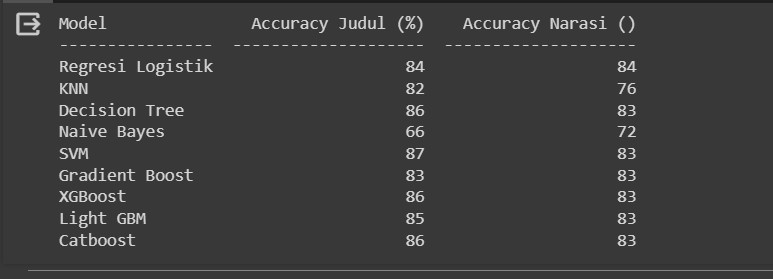

In [ ]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/RifqiHafizuddin/DataMiningUTS/main/img/model.jpg")

Berdasarkan hasil accuracy model, dapat dilihat bahwa model **SVM** merupakan model terbaik

#3. Analisis

## Visualisasi Judul

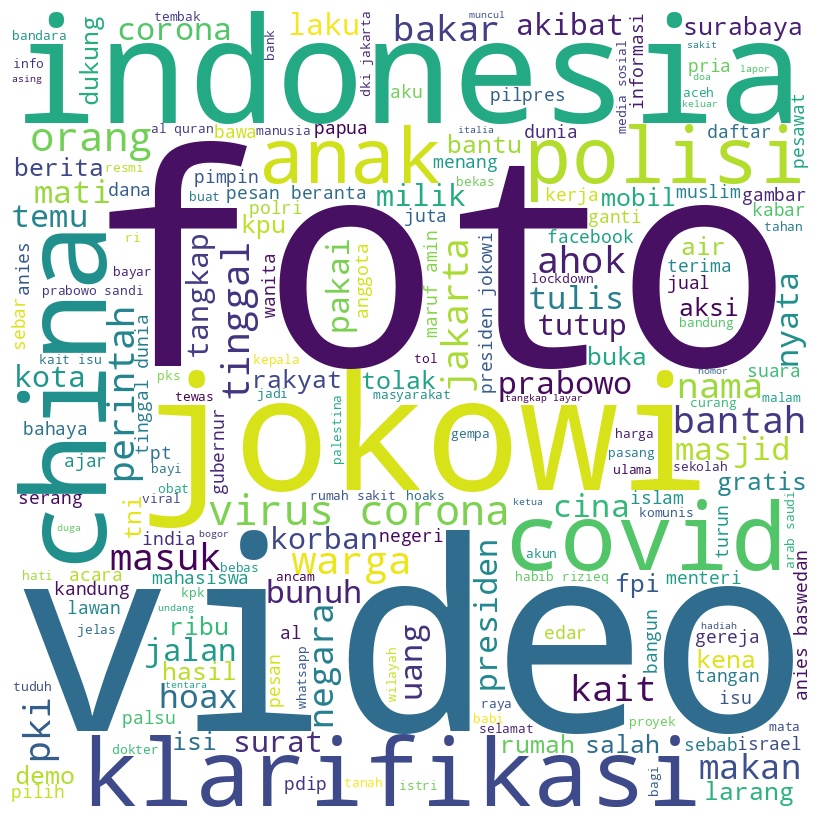

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data["judul_clean_string"]:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Terlihat bahwa kata-kata yang paling sering muncul adalah video, Jokowi, foto, indonesia, klarifikasi, dan china

In [ ]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'label', 'tanggal', 'judul',
       'narasi', 'nama file gambar', 'tokenized_judul', 'tokenized_narasi',
       'tokenized_judul_freq', 'tokenized_narasi_freq',
       'judul_stopword_applied', 'narasi_stopword_applied', 'judul_baku',
       'narasi_baku', 'judul_stemmed', 'narasi_stemmed', 'judul_clean_string',
       'narasi_clean_string', 'judul_list', 'narasi_list', 'TF_dict_judul',
       'TF_dict_narasi', 'TF-IDF_dict_judul', 'TF-IDF_dict_narasi',
       'TF-IDF_positive_judul', 'TF-IDF_negative_judul',
       'TF-IDF_positive_narasi', 'TF-IDF_negative_narasi', 'status_judul',
       'status_narasi', 'judul_cleaned', 'narasi_cleaned'],
      dtype='object')

In [ ]:
data[['label','judul_clean_string']].to_csv("judul.csv", index=False, header=False)

In [ ]:
data['judul_clean_string'].to_csv("judul_only.csv", index=False, header=False)

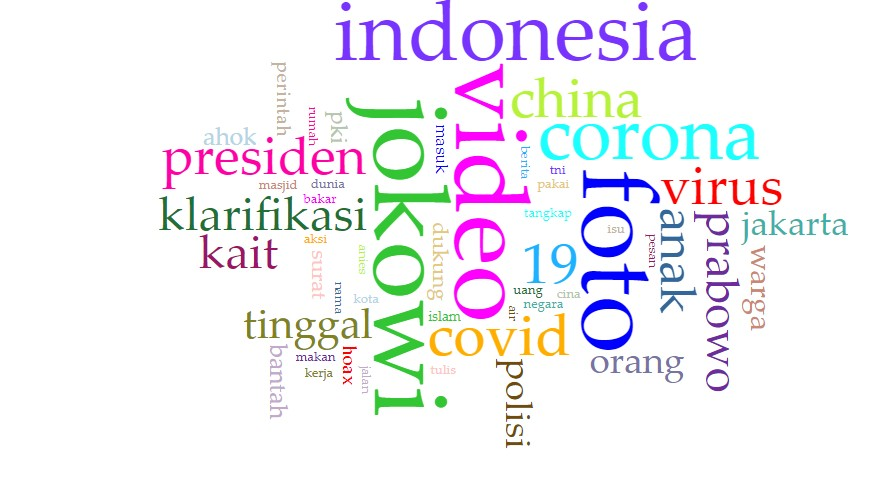

In [ ]:
#Visualisasi
from IPython.display import Image
Image("https://raw.githubusercontent.com/RifqiHafizuddin/DataMiningUTS/main/img/judul.jpg")

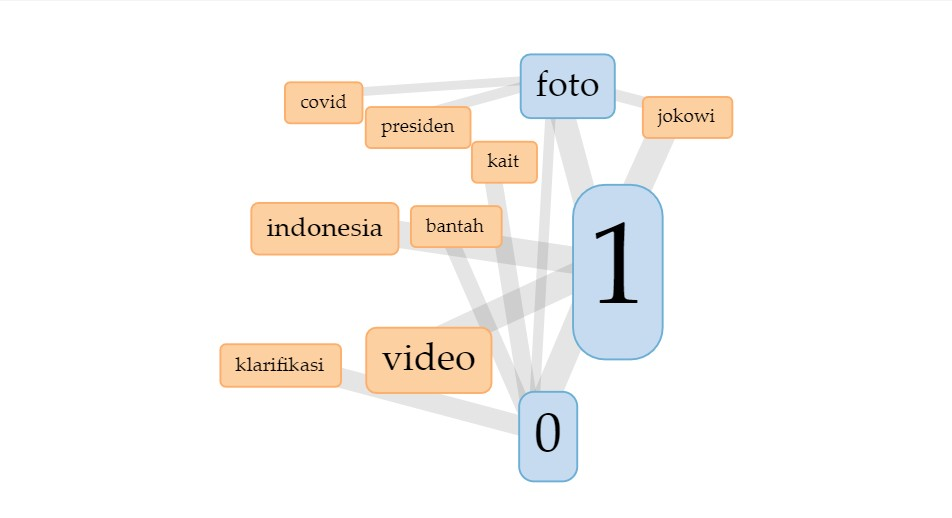

In [ ]:
#Visualisasi
from IPython.display import Image
Image("https://raw.githubusercontent.com/RifqiHafizuddin/DataMiningUTS/main/img/judul2.jpg")

Dapat dilihat bahwa judul yang mengandung kata-kata indonesia dan video biasanya merupakan hoaks, sedangkan judul dengan kata-kataklarifikasi, bantah, dan kait bukan hoaks

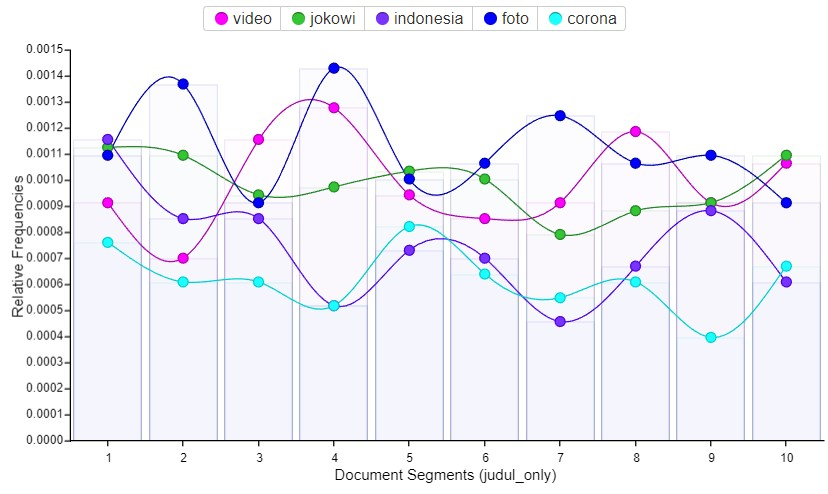

In [ ]:
#Visualisasi
from IPython.display import Image
Image("https://raw.githubusercontent.com/RifqiHafizuddin/DataMiningUTS/main/img/judul3.jpg")

## Visualisasi Narasi

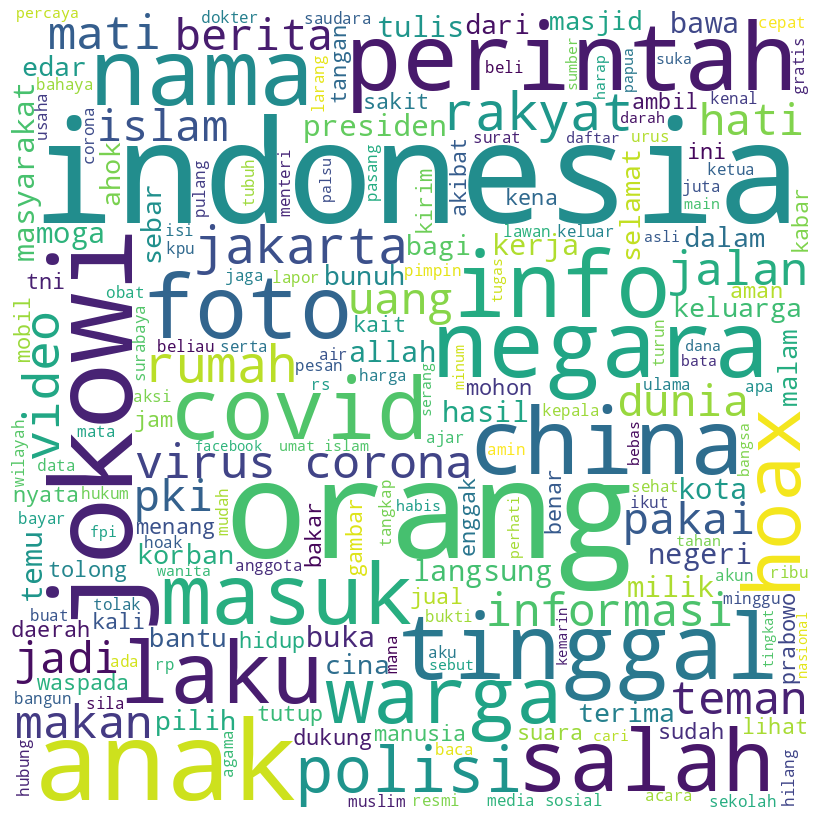

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data["narasi_clean_string"]:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Terlihat bahwa kata-kata yang paling sering muncul adalah Jokowi, foto, indonesia, orang, perintah, negara, dan lainnya

In [ ]:
data[['label','narasi_clean_string']].to_csv("narasi.csv", index=False, header=False)

In [ ]:
data['narasi_clean_string'].to_csv("narasi_only.csv", index=False, header=False)

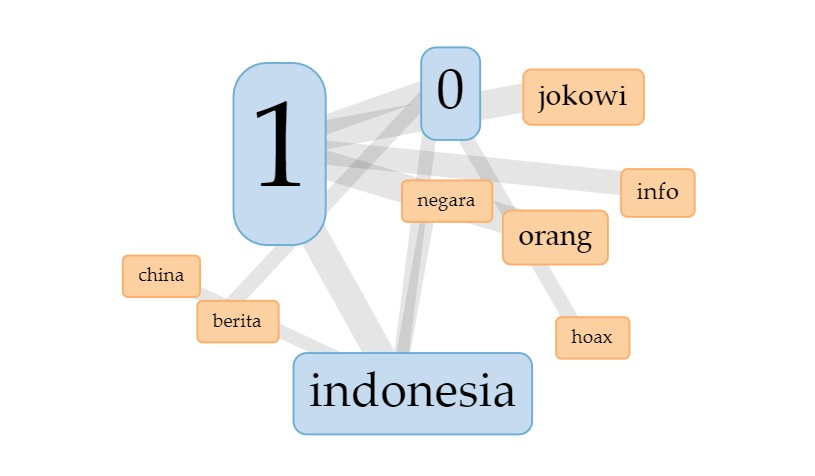

In [ ]:
#Visualisasi
from IPython.display import Image
Image("https://raw.githubusercontent.com/RifqiHafizuddin/DataMiningUTS/main/img/narasi.jpg")

Dapat dilihat bahwa narasi yang mengandung kata-kata orang, info, dan jokowi biasanya merupakan hoaks, sedangkan narasi dengan kata-kata klarifikasi, bantah, dan kait bukan hoaks

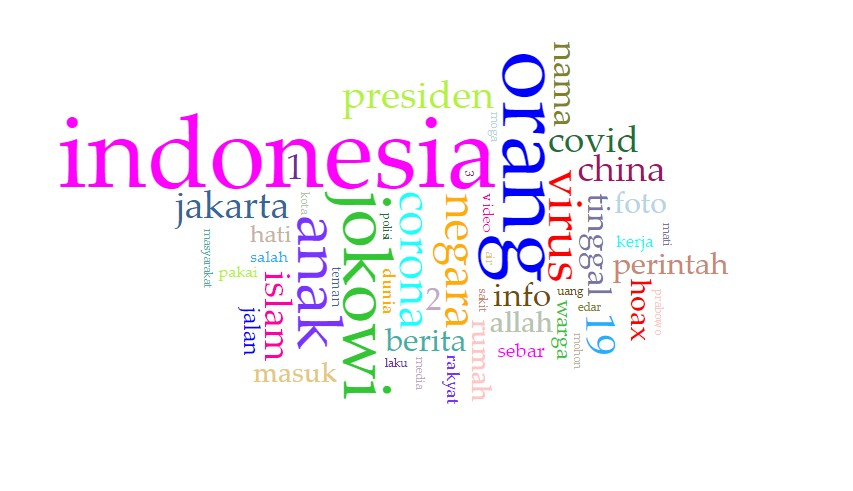

In [ ]:
#Visualisasi
from IPython.display import Image
Image("https://raw.githubusercontent.com/RifqiHafizuddin/DataMiningUTS/main/img/narasi2.jpg")

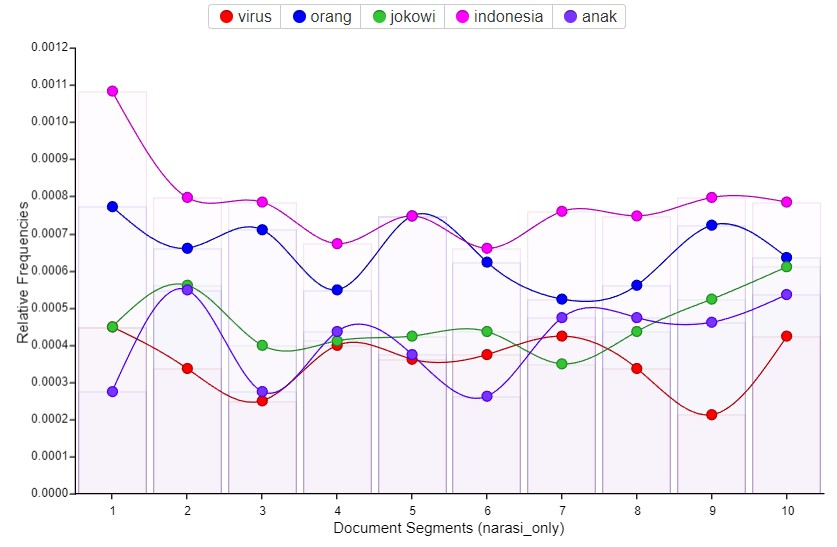

In [ ]:
#Visualisasi
from IPython.display import Image
Image("https://raw.githubusercontent.com/RifqiHafizuddin/DataMiningUTS/main/img/narasi3.jpg")

## Topic Modelling

###Narasi

In [ ]:
vectorizer = CountVectorizer(binary = False, lowercase=True)
vsm = vectorizer.fit_transform(data['narasi_clean_string'])
# Mengapa tf bukan tfidf?
# Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.
# Saran: untuk penelitian VS di Industri.
print(vsm.shape) # Sama

(4701, 14300)


In [ ]:
# Dilanjutkan dengan membentuk model LDA-nya
from sklearn.decomposition import LatentDirichletAllocation as LDA
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
n_topics = 2
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(vsm)
lda

LatentDirichletAllocation(n_components=2, random_state=0)

In [ ]:
# Melihat Topik-topiknya
vsm_topics = lda.transform(vsm)
print(vsm_topics.shape)
vsm_topics[:10]
# Ukuran kolom = #Topics ==> Dimension Reduction

(4701, 2)


array([[0.98876803, 0.01123197],
       [0.72835006, 0.27164994],
       [0.94293417, 0.05706583],
       [0.0139553 , 0.9860447 ],
       [0.19211307, 0.80788693],
       [0.01226887, 0.98773113],
       [0.82487512, 0.17512488],
       [0.73672466, 0.26327534],
       [0.90154884, 0.09845116],
       [0.93176268, 0.06823732]])

In [ ]:
from tqdm import tqdm


100%|██████████| 4701/4701 [00:00<00:00, 457003.66it/s]


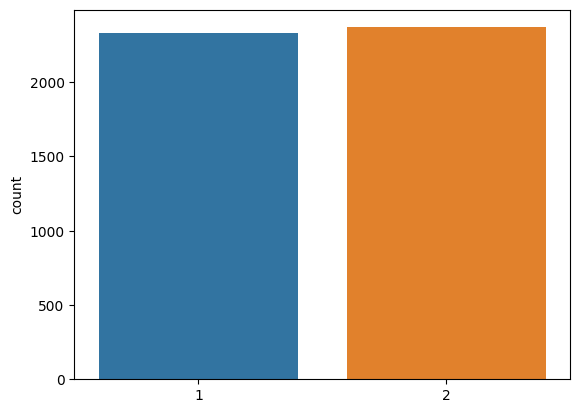

In [ ]:
# Seandainya diasumsikan 1 dokumen hanya 1 topic dengan nilai skor topic terbesar
doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
p = sns.countplot(x=doc_topic)

###Judul

In [ ]:
vectorizer = CountVectorizer(binary = False, lowercase=True)
vsm = vectorizer.fit_transform(data['judul_clean_string'])
# Mengapa tf bukan tfidf?
# Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.
# Saran: untuk penelitian VS di Industri.
print(vsm.shape) # Sama

(4701, 7279)


In [ ]:
# Dilanjutkan dengan membentuk model LDA-nya
from sklearn.decomposition import LatentDirichletAllocation as LDA
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
n_topics = 2
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(vsm)
lda

LatentDirichletAllocation(n_components=2, random_state=0)

In [ ]:
# Melihat Topik-topiknya
vsm_topics = lda.transform(vsm)
print(vsm_topics.shape)
vsm_topics[:10]
# Ukuran kolom = #Topics ==> Dimension Reduction

(4701, 2)


array([[0.09562286, 0.90437714],
       [0.06254214, 0.93745786],
       [0.49770827, 0.50229173],
       [0.65630724, 0.34369276],
       [0.12570991, 0.87429009],
       [0.9227724 , 0.0772276 ],
       [0.2259177 , 0.7740823 ],
       [0.43745877, 0.56254123],
       [0.93014035, 0.06985965],
       [0.16340172, 0.83659828]])

100%|██████████| 4701/4701 [00:00<00:00, 206495.43it/s]


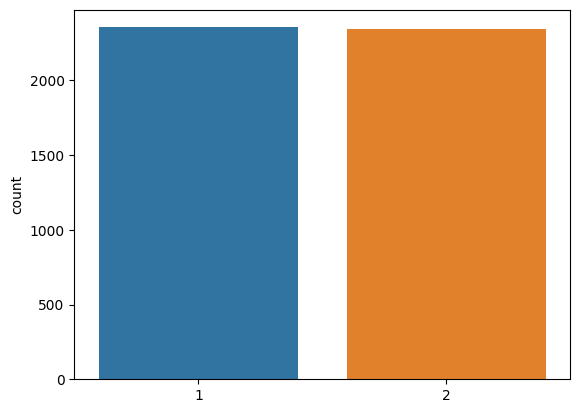

In [ ]:
# Seandainya diasumsikan 1 dokumen hanya 1 topic dengan nilai skor topic terbesar
doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
p = sns.countplot(x=doc_topic)